In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install gdown

In [2]:
import gdown

file_id = '1-97vLGNobzgp7Fqo9InviFgQi5UEJKpH'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'kickstarter_econ_final.csv'  # Replace with your desired local file name and extension
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-97vLGNobzgp7Fqo9InviFgQi5UEJKpH
To: /content/kickstarter_econ_final.csv
100%|██████████| 60.3M/60.3M [00:00<00:00, 82.5MB/s]


'kickstarter_econ_final.csv'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('/content/kickstarter_econ_final.csv', encoding='latin')

In [7]:
df

,ID,name,category,main_category,currency,user_gender,deadline_date,deadline_time,goal,launched_date,launched_time,pledged,state,backers,country,continent,usd_pledged,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,campaign_duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,female,2015-10-09,11:36:00,1000.0,2015-08-11,12:12:28,0.0,failed,0,RU,EU,0.0,143989754,13.3,0.803908,70.264,14.95315,12.019990,23286.080650,59
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,female,2013-02-26,0:20:50,45000.0,2013-01-12,0:20:50,220.0,failed,3,US,NoA,220.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,female,2012-04-16,4:24:11,5000.0,2012-03-17,3:24:11,1.0,failed,1,CA,NoA,1.0,36624199,9.4,0.920284,82.224,16.32500,13.105115,42581.914330,30
3,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,female,2016-04-01,13:38:27,50000.0,2016-02-26,13:38:27,52375.0,successful,224,FR,EU,52375.0,64979548,14.0,0.897436,82.359,16.26508,11.625174,38085.400330,35
4,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,female,2014-12-21,18:30:44,1000.0,2014-12-01,18:30:44,1205.0,successful,16,SA,AS,1205.0,32938213,13.6,0.846602,74.444,16.11227,9.627520,51320.113230,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276858,999972264,Islanda,Documentary,Film & Video,USD,female,2012-03-16,3:31:10,1700.0,2012-02-15,4:31:10,25.0,failed,1,KE,AF,25.0,49699862,43.4,0.554679,62.164,11.08000,6.314098,2880.739597,30
276859,999977640,The Tribe,Narrative Film,Film & Video,USD,male,2011-07-19,3:35:14,1500.0,2011-06-22,3:35:14,155.0,failed,5,MY,AS,155.0,31624264,3.8,0.789450,74.901,13.07991,10.110949,24619.654700,27
276860,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,male,2010-08-16,5:59:00,15000.0,2010-07-01,19:40:30,20.0,failed,1,US,NoA,20.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960,46
276861,999987933,BioDefense Education Kit,Technology,Technology,USD,male,2016-02-13,2:00:00,15000.0,2016-01-13,18:13:53,200.0,failed,6,AU,OC,200.0,24450561,13.4,0.938680,82.537,20.43272,13.175100,42822.196270,31


In [8]:
state_counts = df['main_category'].value_counts()
print(state_counts)

categ_counts = df['category'].value_counts()
print(categ_counts)

main_category
Film & Video    50246
Music           40209
Publishing      29691
Games           22026
Art             21410
Technology      21104
Design          19711
Food            18572
Fashion         15575
Theater          9177
Photography      8526
Comics           7772
Crafts           6214
Journalism       3479
Dance            3151
Name: count, dtype: int64
category
Product Design    14322
Documentary       13129
Shorts            10601
Music             10561
Food               9379
                  ...  
Weaving              59
Residencies          51
Letterpress          34
Chiptune             30
Taxidermy             9
Name: count, Length: 158, dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276863 entries, 0 to 276862
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             276863 non-null  int64  
 1   name                           276863 non-null  object 
 2   category                       276863 non-null  object 
 3   main_category                  276863 non-null  object 
 4   currency                       276863 non-null  object 
 5   user_gender                    276863 non-null  object 
 6   deadline_date                  276863 non-null  object 
 7   deadline_time                  276863 non-null  object 
 8   goal                           276863 non-null  float64
 9   launched_date                  276863 non-null  object 
 10  launched_time                  276863 non-null  object 
 11  pledged                        276863 non-null  float64
 12  state                         

**Project Name / Description Features:** From our hypothesis, we suggested that how the project name or description is written may affect the success of the project. So we create some features related to project name. We dont have description of the project in this dataset, so we avoid that.
* Number of Words Used
* Number of Characters Used
* Number of Syllables Used

**Project Launched Date Features:** Also, we suggested that the project first launch can affect its success. So we create some date - time related features :

* Launched Day, Month
* Total Duration of the Project
* Was project launched on weekday or weekend

**Project Category Features:** These are more likely the high level features which provides the idea about the category / sub-category of the project. Also, we add some extra information with category such as the popularity of the category calculated from the total number of projects posted in that category.

In [10]:
!pip install --upgrade pdpbox
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=30f00c5e55904c36ec78b46217ed16730b4431fd2f75f4d69c4a38660b86fbb6
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [11]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from pdpbox import pdp, info_plots
from eli5.sklearn import PermutationImportance

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from collections import Counter

import warnings
import eli5

In [12]:
def count_syllable(word):
  word = word.lower()
  count = 0
  if word[0] in {'a','e','i','o','u'}:
    count += 1
  for index in range(1, len(word)):
    if word[index] in {'a','e','i','o','u'} and word[index - 1] not in {'a','e','i','o','u'}:
            count += 1
  if word.endswith("e"):
        count -= 1
  if count == 0:
        count += 1
  return count

In [13]:
df['launched_date'] = pd.to_datetime(df['launched_date'])
df['deadline_date'] = pd.to_datetime(df['deadline_date'])

df['syllable_count'] = df['name'].apply(lambda x: count_syllable(x))
df['launch_month'] = df['launched_date'].dt.month
df['launch_day'] = df['launched_date'].dt.weekday
df['is_weekend'] = df['launch_day'].apply(lambda x: 1 if x > 4 else 0)
df['word_count'] = df['name'].apply(lambda x: len(x.split()))
df['char_count'] = df['name'].apply(lambda x: len(x.replace("", "")))

df = pd.concat([df, pd.get_dummies(df['main_category'])], axis = 1)
le = LabelEncoder()
for c in ['category', 'main_category']:
  df[c] = le.fit_transform(df[c])

df['user_gender'] = df['user_gender'].map({'male': 1, 'female': 0})
df['state'] = df['state'].map({'successful': 1, 'failed': 0})

df

,ID,name,category,main_category,currency,user_gender,deadline_date,deadline_time,goal,launched_date,launched_time,pledged,state,backers,country,continent,usd_pledged,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,campaign_duration,syllable_count,launch_month,launch_day,is_weekend,word_count,char_count,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,1000002330,The Songs of Adelaide & Abullah,107,12,GBP,0,2015-10-09,11:36:00,1000.0,2015-08-11,12:12:28,0.0,0,0,RU,EU,0.0,143989754,13.3,0.803908,70.264,14.95315,12.019990,23286.080650,59,10,8,1,0,6,31,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,1000004038,Where is Hank?,92,6,USD,0,2013-02-26,0:20:50,45000.0,2013-01-12,0:20:50,220.0,0,3,US,NoA,220.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960,45,4,1,5,1,3,14,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,89,10,USD,0,2012-04-16,4:24:11,5000.0,2012-03-17,3:24:11,1.0,0,1,CA,NoA,1.0,36624199,9.4,0.920284,82.224,16.32500,13.105115,42581.914330,30,15,3,5,1,7,49,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,1000014025,Monarch Espresso Bar,122,7,USD,0,2016-04-01,13:38:27,50000.0,2016-02-26,13:38:27,52375.0,1,224,FR,EU,52375.0,64979548,14.0,0.897436,82.359,16.26508,11.625174,38085.400330,35,6,2,4,0,3,20,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,1000023410,Support Solar Roasted Coffee & Green Energy! ...,58,7,USD,0,2014-12-21,18:30:44,1000.0,2014-12-01,18:30:44,1205.0,1,16,SA,AS,1205.0,32938213,13.6,0.846602,74.444,16.11227,9.627520,51320.113230,20,16,12,0,0,8,60,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276858,999972264,Islanda,39,6,USD,0,2012-03-16,3:31:10,1700.0,2012-02-15,4:31:10,25.0,0,1,KE,AF,25.0,49699862,43.4,0.554679,62.164,11.08000,6.314098,2880.739597,30,3,2,2,0,1,7,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
276859,999977640,The Tribe,92,6,USD,1,2011-07-19,3:35:14,1500.0,2011-06-22,3:35:14,155.0,0,5,MY,AS,155.0,31624264,3.8,0.789450,74.901,13.07991,10.110949,24619.654700,27,2,6,2,0,2,9,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
276860,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,92,6,USD,1,2010-08-16,5:59:00,15000.0,2010-07-01,19:40:30,20.0,0,1,US,NoA,20.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960,46,21,7,3,0,11,71,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
276861,999987933,BioDefense Education Kit,137,13,USD,1,2016-02-13,2:00:00,15000.0,2016-01-13,18:13:53,200.0,0,6,AU,OC,200.0,24450561,13.4,0.938680,82.537,20.43272,13.175100,42822.196270,31,9,1,2,0,3,24,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


 LE may not be a perfect choice for this rather OneHot Encoder should be used. But In our use-case we are just trying to understand the effect of a column as a whole, so we can use label encoder.

In [14]:
t2 = df.groupby('main_category').agg({'goal': 'mean', 'category': 'sum'})
t1 = df.groupby('category').agg({'goal': 'mean', 'main_category': 'sum'})

t2 = t2.reset_index().rename(columns={'goal' : 'mean_main_category_goal', 'category' : 'main_category_count'})
t1 = t1.reset_index().rename(columns={'goal' : 'mean_category_goal', 'main_category' : 'category_count'})

df = df.merge(t1, on = 'category')
df = df.merge(t2, on = 'main_category')

df['diff_mean_category_goal'] = df['mean_category_goal'] - df['goal']
df['diff_mean_category_goal'] = df['mean_main_category_goal'] - df['goal']

df

,ID,name,category,main_category,currency,user_gender,deadline_date,deadline_time,goal,launched_date,launched_time,pledged,state,backers,country,continent,usd_pledged,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,campaign_duration,syllable_count,launch_month,launch_day,is_weekend,word_count,char_count,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,mean_category_goal,category_count,mean_main_category_goal,main_category_count,diff_mean_category_goal
0,1000002330,The Songs of Adelaide & Abullah,107,12,GBP,0,2015-10-09,11:36:00,1000.0,2015-08-11,12:12:28,0.0,0,0,RU,EU,0.00,143989754,13.3,0.803908,70.264,14.953150,12.019990,23286.080650,59,10,8,1,0,6,31,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,5111.450100,13188,18641.083702,2040300,17641.083702
1,1001028167,Steel Cathedrals- Short poems for the digital ...,107,12,GBP,0,2013-07-28,23:17:04,4000.0,2013-06-28,23:17:04,20.0,0,1,MA,AF,30.66,35739580,15.0,0.647402,74.310,12.054940,5.037844,7194.916461,30,13,6,4,0,8,50,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,5111.450100,13188,18641.083702,2040300,14641.083702
2,1001468086,Bass River Press,107,12,USD,0,2015-04-05,19:58:58,2000.0,2015-03-06,19:58:58,325.0,0,6,IT,EU,325.00,59359900,29.9,0.886552,83.338,16.258270,10.868793,33572.982490,30,4,3,4,0,3,16,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,5111.450100,13188,18641.083702,2040300,16641.083702
3,1001991458,Poems For Apostates & tales of a young Sciento...,107,12,USD,0,2014-05-31,17:47:00,10000.0,2014-05-01,17:47:49,101.0,0,2,US,NoA,101.00,324459463,15.1,0.919553,79.222,16.538150,13.217890,53245.076960,30,15,5,3,0,9,52,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,5111.450100,13188,18641.083702,2040300,8641.083702
4,1002519316,"Your poem, by me.",107,12,CAD,1,2015-10-31,19:00:32,1000.0,2015-10-01,20:00:32,55.0,0,3,ID,AS,40.98,263991379,10.9,0.688847,69.052,12.867660,7.934817,10053.337700,30,3,10,3,0,4,17,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,5111.450100,13188,18641.083702,2040300,17641.083702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276858,863808343,MOTION 2014 Summer Choreographic Residency,121,3,USD,1,2013-11-16,7:00:00,5000.0,2013-10-18,15:28:37,5302.0,1,54,PG,OC,5302.00,8251162,37.0,0.516168,62.769,9.899738,4.328000,2711.765948,29,11,10,4,0,5,42,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,15044.764706,153,8238.072136,191226,3238.072136
276859,875847278,Help PEARSONWIDRIG DANCETHEATER go to Cuba!,121,3,USD,0,2016-01-01,5:59:00,10000.0,2015-11-29,0:24:34,11246.0,1,72,UA,EU,11246.00,44222947,24.1,0.743049,71.129,15.306720,11.340000,7361.011228,33,13,11,6,1,6,43,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,15044.764706,153,8238.072136,191226,-1761.927864
276860,93590450,The Friendship Club,121,3,USD,1,2014-09-03,4:08:38,3000.0,2014-08-04,4:08:38,3545.0,1,31,US,NoA,3545.00,324459463,15.1,0.919553,79.222,16.538150,13.217890,53245.076960,30,4,8,0,0,3,19,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,15044.764706,153,8238.072136,191226,5238.072136
276861,948299537,rLand,121,3,CAD,0,2014-10-18,20:09:33,500000.0,2014-08-19,20:09:33,51.0,0,6,HR,EU,46.85,4189353,19.5,0.827403,77.495,15.259550,11.222197,20291.343650,60,1,8,1,0,1,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,15044.764706,153,8238.072136,191226,-491761.927864


We will train a single random forest regression model for this task. There are ofcourse many other model's available as well such as lightgbm or xgboost, but in this kernel I am not focussing on evaluation metric rather the inisights from predictive modelling.

In [15]:
label = df.state

features = [c for c in df.columns if c not in ['ID', 'state', 'name', 'currency', 'country', 'continent', 'deadline_date', 'deadline_time', 'launched_date', 'launched_time', 'pledged', 'usd_pledged', 'backers']]
features

['category',
 'main_category',
 'user_gender',
 'goal',
 'population',
 'population_below_poverty_line',
 'hdi',
 'life_expectancy',
 'expected_years_of_schooling',
 'mean_years_of_schooling',
 'gni',
 'campaign_duration',
 'syllable_count',
 'launch_month',
 'launch_day',
 'is_weekend',
 'word_count',
 'char_count',
 'Art',
 'Comics',
 'Crafts',
 'Dance',
 'Design',
 'Fashion',
 'Film & Video',
 'Food',
 'Games',
 'Journalism',
 'Music',
 'Photography',
 'Publishing',
 'Technology',
 'Theater',
 'mean_category_goal',
 'category_count',
 'mean_main_category_goal',
 'main_category_count',
 'diff_mean_category_goal']

We removed the ff. columns: pledged, usd_pledged, backers because these variables are already given as the most important and realistic factors that determine the success/failure of a project. What we want to know are the other variables aside from these obvious ones.

**Random Forest Classifier**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[features], label, test_size=0.25, random_state=23)
X_train1, y_train1 = X_train, y_train
X_test1, y_test1 = X_test, y_test

rf_model1 = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=23).fit(X_train1, y_train1)
y_pred1 = rf_model1.predict(X_test1)

In [17]:
rf_accuracy = accuracy_score(y_test1, y_pred1)
rf_precision = precision_score(y_test1, y_pred1)
rf_recall = recall_score(y_test1, y_pred1)
rf_f1 = f1_score(y_test1, y_pred1)
rf_conf_matrix = confusion_matrix(y_test1, y_pred1)

print("RF Accuracy:", rf_accuracy)
print("RF Precision:", rf_precision)
print("RF Recall:", rf_recall)
print("RF F1 Score:", rf_f1)
print("RF Confusion Matrix:\n", rf_conf_matrix)

RF Accuracy: 0.6803773693943597
RF Precision: 0.6405296830828746
RF Recall: 0.464735516372796
RF F1 Score: 0.5386524305048693
RF Confusion Matrix:
 [[34178  7248]
 [14875 12915]]


RF model is only 67.08% accurate. So let us test some more other models.

### GB Model

In [18]:
gb_model = GradientBoostingClassifier(random_state=41)
gb_model.fit(X_train1, y_train1)
y_pred_gb = gb_model.predict(X_test1)

gb_accuracy = accuracy_score(y_test1, y_pred_gb)
gb_precision = precision_score(y_test1, y_pred_gb)
gb_recall = recall_score(y_test1, y_pred_gb)
gb_f1 = f1_score(y_test1, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test1, y_pred_gb)

print("GB Accuracy:", gb_accuracy)
print("GB Precision:", gb_precision)
print("GB Recall:", gb_recall)
print("GB F1 Score:", gb_f1)
print("GB Confusion Matrix:\n", gb_conf_matrix)

GB Accuracy: 0.6797850208044383
GB Precision: 0.6366993876955972
GB Recall: 0.47146455559553796
GB F1 Score: 0.5417631491895467
GB Confusion Matrix:
 [[33950  7476]
 [14688 13102]]


### XGBoost

In [19]:
!pip install xgboost

In [20]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=41)
xgb_model.fit(X_train1, y_train1)
y_pred_xgb = xgb_model.predict(X_test1)

xgb_accuracy = accuracy_score(y_test1, y_pred_xgb)
xgb_precision = precision_score(y_test1, y_pred_xgb)
xgb_recall = recall_score(y_test1, y_pred_xgb)
xgb_f1 = f1_score(y_test1, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test1, y_pred_xgb)

print("XGB Accuracy:", xgb_accuracy)
print("XGB Precision:", xgb_precision)
print("XGB Recall:", xgb_recall)
print("XGB F1 Score:", xgb_f1)
print("XGB Confusion Matrix:\n", xgb_conf_matrix)

XGB Accuracy: 0.6856218215441516
XGB Precision: 0.6310527688429105
XGB Recall: 0.5224181360201511
XGB F1 Score: 0.571619812583668
XGB Confusion Matrix:
 [[32938  8488]
 [13272 14518]]


### LightGBM

In [21]:
!pip install lightgbm

In [22]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train1, label=y_train1)
test_data = lgb.Dataset(X_test1, label=y_test1, reference=train_data)

params = {
    'objective': 'binary',  # Use 'multiclass' if it's a multi-class classification problem
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',  # Use 'multi_logloss' for multi-class
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

bst = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data], callbacks=[lgb.early_stopping(stopping_rounds=10)])

y_pred_proba = bst.predict(X_test1, num_iteration=bst.best_iteration)
y_pred_lgb = (y_pred_proba >= 0.5).astype(int)  # Convert probabilities to binary output

lgb_accuracy = accuracy_score(y_test1, y_pred_lgb)
lgb_precision = precision_score(y_test1, y_pred_lgb)
lgb_recall = recall_score(y_test1, y_pred_lgb)
lgb_f1 = f1_score(y_test1, y_pred_lgb)
lgb_conf_matrix = confusion_matrix(y_test1, y_pred_lgb)

print(f"LGB Accuracy: {lgb_accuracy}")
print(f"LGB Precision: {lgb_precision}")
print(f"LGB Recall: {lgb_recall}")
print(f"LGB F1 Score: {lgb_f1}")
print("LGB Confusion Matrix:")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 83469, number of negative: 124178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.165733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2421
[LightGBM] [Info] Number of data points in the train set: 207647, number of used features: 38
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.401975 -> initscore=-0.397241
[LightGBM] [Info] Start training from score -0.397241
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.582736
LGB Accuracy: 0.6848849976883957
LGB Precision: 0.6377713258675515
LGB Recall: 0.49798488664987406
LGB F1 Score: 0.559275798662329

### CatBoost

In [23]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00


In [24]:
from catboost import CatBoostClassifier, Pool

cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    logging_level='Silent'
)

cat_model.fit(X_train1, y_train1, eval_set=(X_test1, y_test1), early_stopping_rounds=10)

y_pred_cat = cat_model.predict(X_test)

cat_accuracy = accuracy_score(y_test1, y_pred_cat)
cat_precision = precision_score(y_test1, y_pred_cat)
cat_recall = recall_score(y_test1, y_pred_cat)
cat_f1 = f1_score(y_test1, y_pred_cat)
cat_conf_matrix = confusion_matrix(y_test1, y_pred_cat)

print(f"Accuracy: {cat_accuracy}")
print(f"Precision: {cat_precision}")
print(f"Recall: {cat_recall}")
print(f"F1 Score: {cat_f1}")
print("Confusion Matrix:")

Accuracy: 0.6843648867313916
Precision: 0.6399868092523673
Recall: 0.48884490824037424
F1 Score: 0.5542974886263949
Confusion Matrix:


XGBoost the best. Ok, so siya na.

### Feature Importance

In [25]:
rf_feature_importances = pd.DataFrame(rf_model1.feature_importances_, index = X_train1.columns, columns=['importance'])
gb_feature_importances = pd.DataFrame(gb_model.feature_importances_, index = X_train1.columns, columns=['importance'])
xgb_feature_importances = pd.DataFrame(xgb_model.feature_importances_, index = X_train1.columns, columns=['importance'])
cat_feature_importances = pd.DataFrame(cat_model.feature_importances_, index = X_train1.columns, columns=['importance'])


rf_feature_importances = rf_feature_importances.sort_values('importance', ascending=False)
gb_feature_importances = gb_feature_importances.sort_values('importance', ascending=False)
xgb_feature_importances = xgb_feature_importances.sort_values('importance', ascending=False)
cat_feature_importances = cat_feature_importances.sort_values('importance', ascending=False)

print(rf_feature_importances[0:10])
# print(gb_feature_importances[0:10])
# print(xgb_feature_importances[0:10])
# print(cat_feature_importances[0:10])

                         importance
goal                       0.137551
diff_mean_category_goal    0.105850
campaign_duration          0.082816
mean_category_goal         0.060206
char_count                 0.054872
category_count             0.050619
category                   0.049209
word_count                 0.042114
syllable_count             0.036069
main_category_count        0.034434


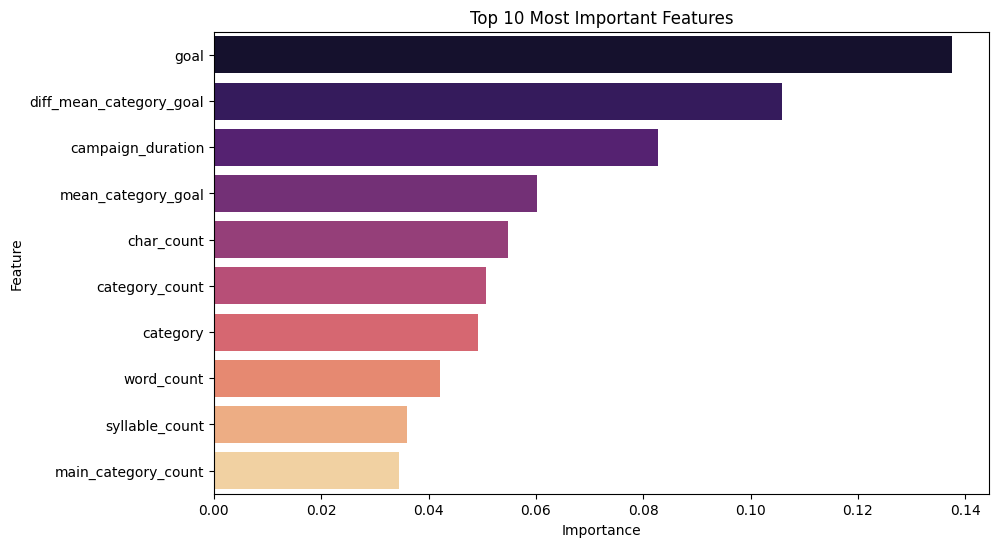

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importances.importance[:10], y=rf_feature_importances.index[:10], palette='magma')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

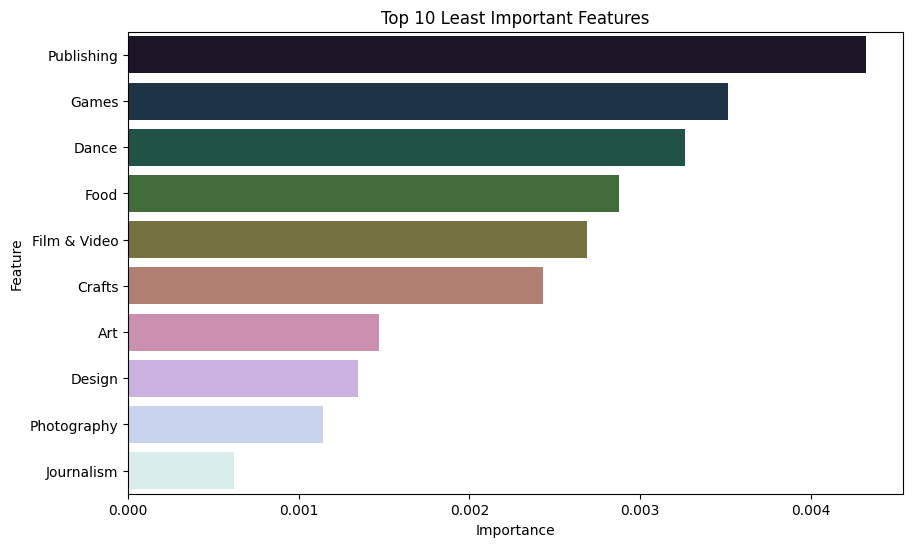

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importances.importance[-10:], y=rf_feature_importances.index[-10:], palette='cubehelix')
plt.title('Top 10 Least Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

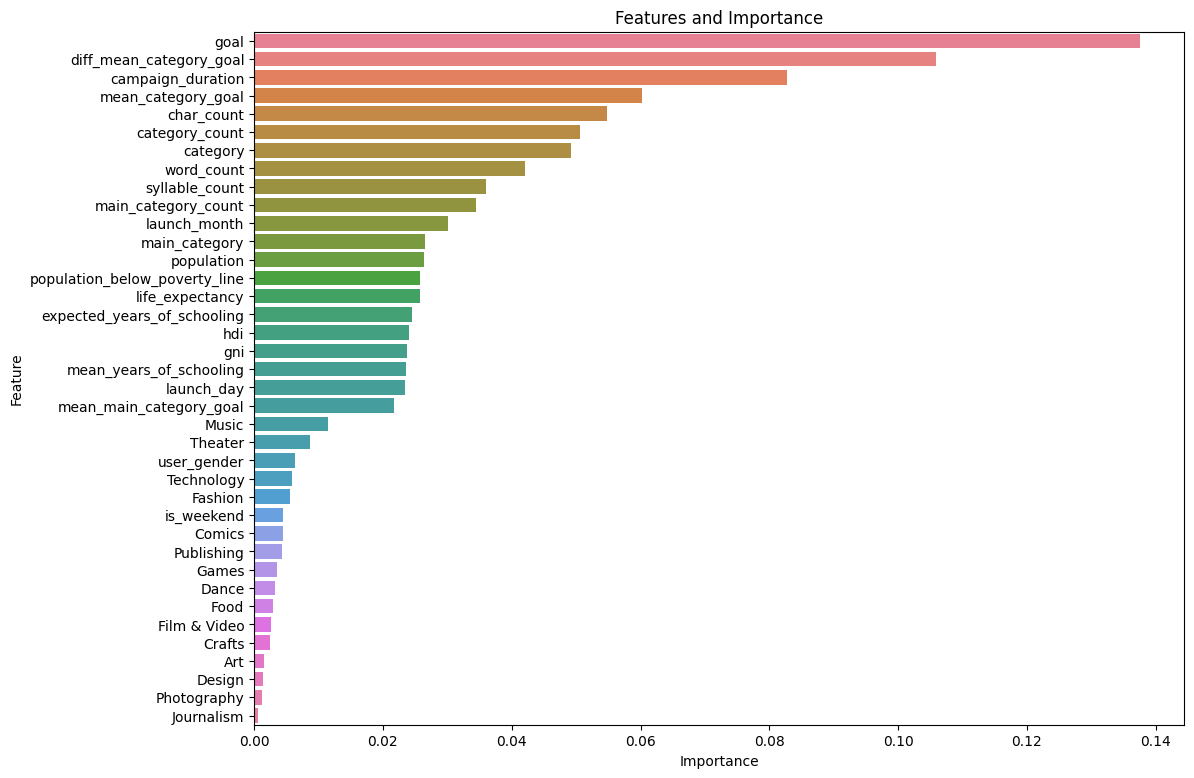

In [28]:
plt.figure(figsize=(12, 9))
sns.barplot(x=rf_feature_importances.importance, y=rf_feature_importances.index, palette='husl')
plt.title('Features and Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Inferences**
* Most important features to predict project success are: goal, number of characters in the project name, campaign duration, month when the project was launched, category, number of syllables and words, as well as the day of launch.
* Interestingly, the population and poverty incidence were also found to be somewhat relevant as predictors.
* Least important features are mostly related to project categories.

**What now?**
* For someone who is willing to crowdfund via Kickstart, one should consider evaluating the ideal project goal and duration. Non-optimal length of the project may more likely lead to the failure. The length of the project title is also seen to affect its relative success or failure.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14')])

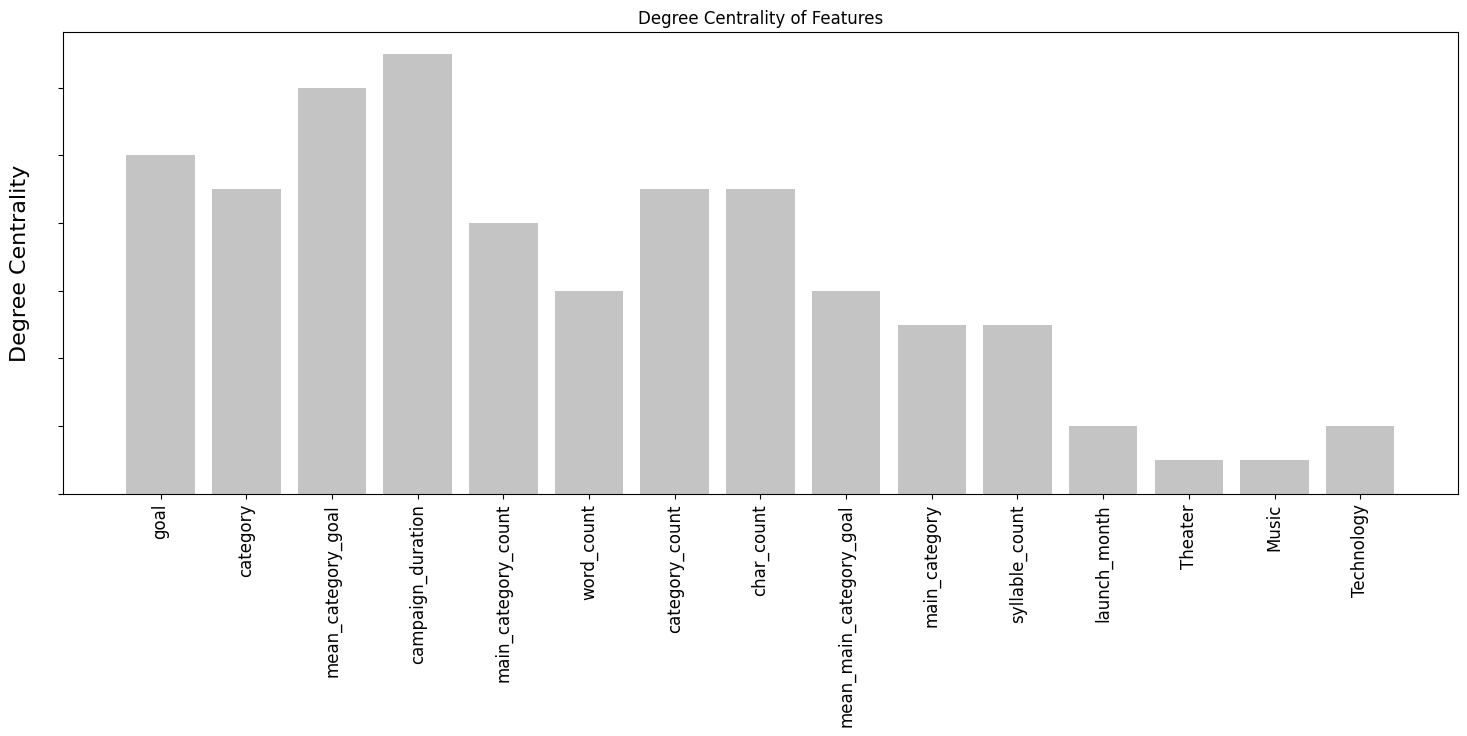

In [29]:
import itertools
import networkx as nx

G = nx.Graph()
for tree_in_forest in rf_model1.estimators_:
  doc = {}
  for i, key in enumerate(X_test1.columns):
    doc[key] = tree_in_forest.feature_importances_[i]
  sorted_doc = sorted(doc.items(), key=lambda kv: kv[1], reverse = True)[:10]
  sorted_doc = [c for c in sorted_doc if c[0] != "diff_mean_category_goal"]
  for i, j in itertools.product(sorted_doc, sorted_doc):
    if i == j:
      continue
    if i[1] >= 0.08 or j[1] >= 0.08:
      if np.absolute(i[1] - j[1]) <= 0.05:
        G.add_edge(i[0], j[0], weight=abs(i[1] - j[1]))

k = dict(G.degree()).keys()
v = dict(G.degree()).values()

plt.figure(figsize=(18, 6))
ax = plt.subplot(111)
plt.bar(k, v, width=0.80, color='#c4c4c4')
plt.title("Degree Centrality of Features")
plt.ylabel("Degree Centrality", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(color="white")

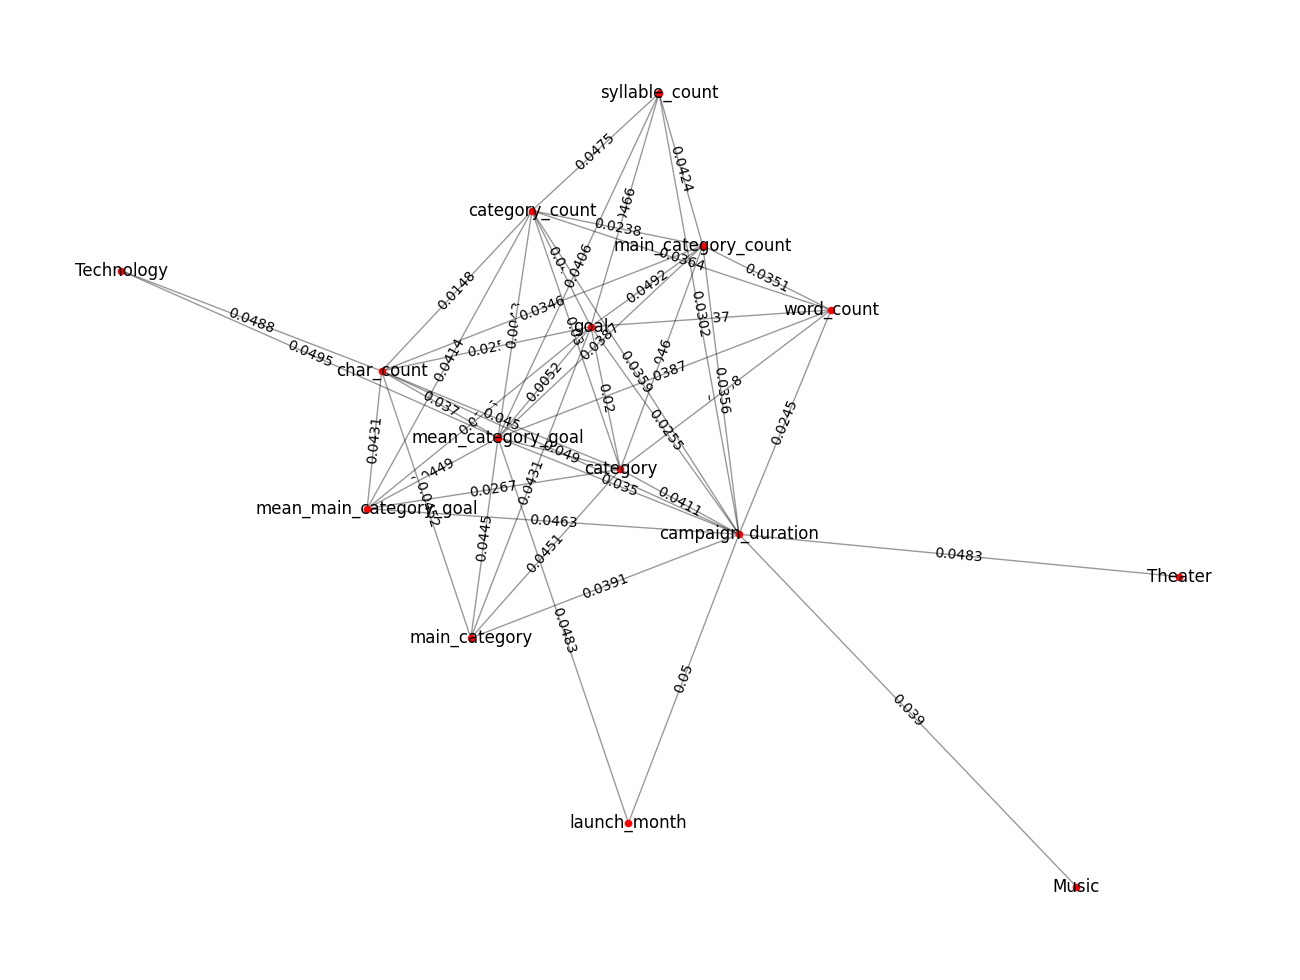

In [30]:
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


labels = {}
for node in G.nodes():
    labels[node] = node

plt.axes([2, 2, 2, 2])
pos = nx.spring_layout(G)
plt.axis('off')
edge_labels = {edge: round(weight, 4) for edge, weight in nx.get_edge_attributes(G, 'weight').items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_nodes(G, pos, node_color = "red", node_size=20)
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='black')
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

In [31]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_model1, random_state=23).fit(X_test, y_test)
pi_df = eli5.explain_weights_df(perm, feature_names = X_test.columns.tolist())
pi_df["color"] = pi_df["weight"].apply(lambda x : "green" if x > 0 else "red")

data = [
    go.Bar(
        orientation = "h",
        y = pi_df.feature[::-1],
        x = pi_df.weight[::-1],
        marker = dict(
            opacity = 0.5,
            color = pi_df.color[::-1]        ),
        error_x = dict( type='data', color="#9fa3a3",
            array=list(pi_df["std"][::-1]),
            visible=True),
        name = 'expenses'
    )
]


layout = go.Layout(title="Permutation Importance", height = 800, margin=dict(l=300))

annotations = []
for i, row in pi_df.iterrows():
    dict(y=row.feature, x=row.weight, text="d",
                                  font=dict(family='Arial', size=14,
                                  color='rgba(245, 246, 249, 1)'),
                                  showarrow=False,)
layout['annotations'] = annotations
fig = go.Figure(data=data, layout = layout)
iplot(fig, filename='base-bar')

In [32]:
imp_df = rf_feature_importances.reset_index().rename(columns = {"index" : "feature"})
combined_df = imp_df.merge(pi_df, on="feature")

trace0 = go.Scatter(
    x = combined_df.importance,
    y = combined_df.weight,
    text = [v.title() if i < 16 else "" for i,v in enumerate(list(combined_df.feature)) ],
    mode='markers+text',
    textposition='top center',
    marker=dict(
        size = 10, color="red", opacity=0.5,
    ),
)

trace1 = go.Scatter(
    x=[0.034, 0.095],
    y=[0.008, 0.020],
    text=['Cluster of Features',
          'Highly Important Features'],
    mode='text',
)

data = [trace0]
layout = go.Layout(title = "Relative Importance vs. Permutation Importance",
                   showlegend = False, yaxis=dict(title="Permutation Importance (Feature Weight)", showgrid=False),
                   xaxis=dict(title="Feature Importance (Relative)", showgrid=False))

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='bubblechart-size-ref')

### Partial Dependencies

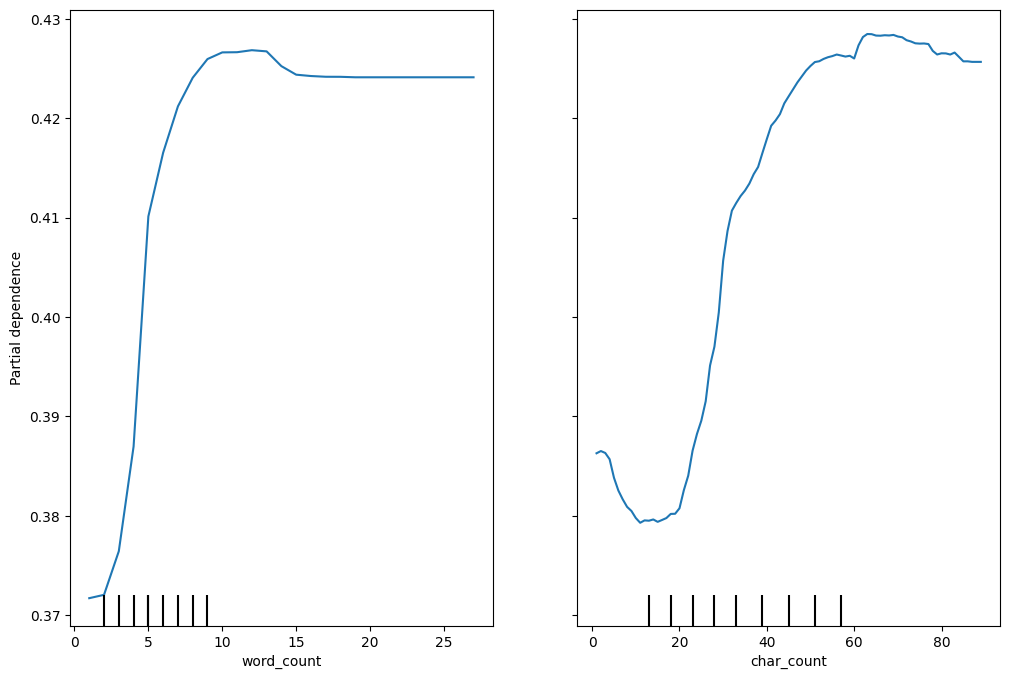

In [42]:
from sklearn.inspection import PartialDependenceDisplay

# features_of_interest = ['word_count', 'char_count', 'syllable_count', 'campaign_duration', 'mean_category_goal', 'diff_mean_category_goal']

fig, ax = plt.subplots(figsize=(12,8))
PartialDependenceDisplay.from_estimator(rf_model1, X_train1, features=['word_count', 'char_count'], ax=ax)
plt.show()

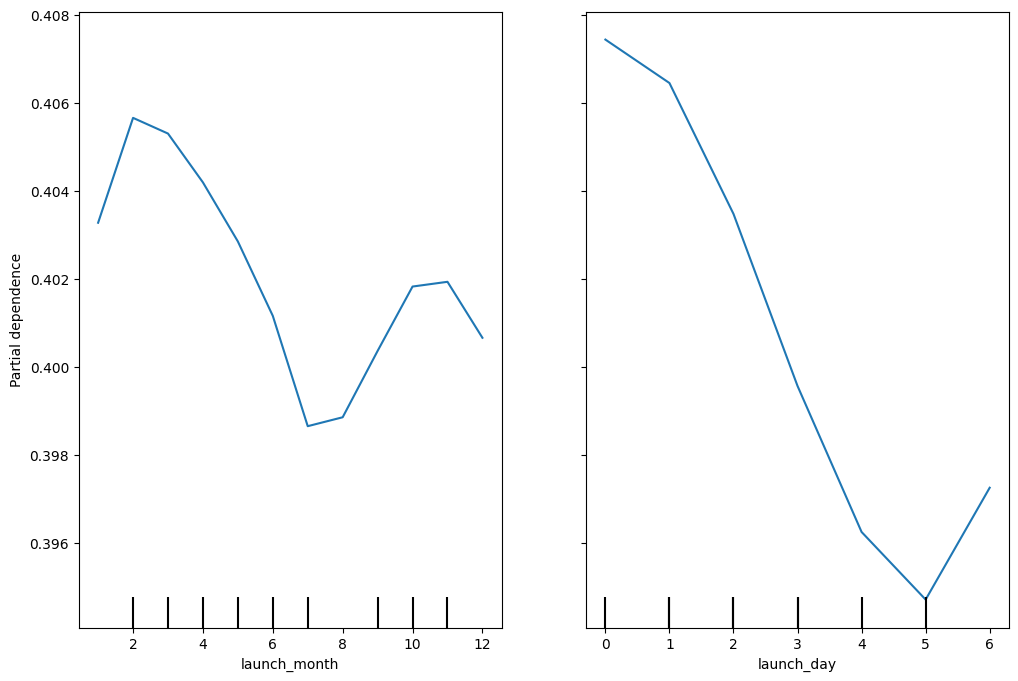

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
PartialDependenceDisplay.from_estimator(rf_model1, X_train1, features=['launch_month', 'launch_day'], ax=ax)
plt.show()

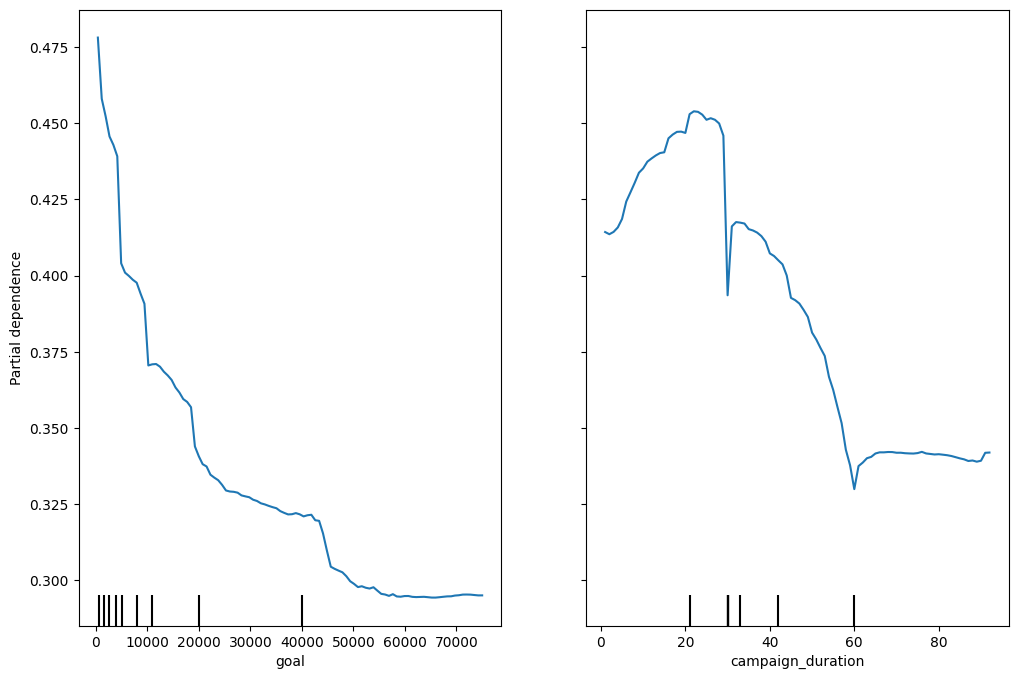

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
PartialDependenceDisplay.from_estimator(rf_model1, X_train1, features=['goal', 'campaign_duration'], ax=ax)
plt.show()

In [ ]:
def actual_prediction_plot(model, X, features, bins=10):
    feature_combinations = list(itertools.combinations(features, 2))

    fig, axes = plt.subplots(len(feature_combinations), 1, figsize=(12, 8 * len(feature_combinations)))

    for i, (f1, f2) in enumerate(feature_combinations):
        # Discretize the features
        X['bin_' + f1] = pd.cut(X[f1], bins, labels=False)
        X['bin_' + f2] = pd.cut(X[f2], bins, labels=False)

        grouped = X.groupby(['bin_' + f1, 'bin_' + f2]).mean()
        predictions = model.predict_proba(grouped)[:, 1]

        # Create a pivot table
        pivot = grouped.pivot(index='bin_' + f1, columns='bin_' + f2, values=predictions)

        sns.heatmap(pivot, ax=axes[i], cmap="Blues", cbar=True)
        axes[i].set_title(f"{f1} vs {f2} Actual Prediction")
        axes[i].set_xlabel(f2)
        axes[i].set_ylabel(f1)

    plt.show()

# Call the function
actual_prediction_plot(rf_model1, X_train1, ['goal', 'main_category', ('goal', 'main_category')], bins=10)

In [45]:
preds = rf_model1.predict(X_test1)
dict(Counter(preds))

{0: 49053, 1: 20163}